#  Mozilla-Outreachy-DataScience-2019 Internship
### Participant: Anastasia Rizzo

## Initial Contribution Task:
* ### Load the data into _R_ or _Python_
    * Notebooks (e.g. Jupyter) make us smile, but scripts work too.
* ### Perform exploratory data analysis.
    * Be verbose as to what you are looking at and why.
    * Keep in mind the primary task below.
* ### Perform data cleaning, if necessary.
    * Again, explain your methodology and reasoning behind it.
* ### **Primary Task** - Answer the following questions:
    * Which single field in `dataset.csv` best describes the `SalePrice` field?
    * Why did you choose this field? Please thoroughly explain your reasoning.
    
## Contribution 2 Task:
* ### Utilize the notebook completed in `initial_contribution`
  - Append new work to the bottom of it. 
* ### Train a regression model predicting `SalePrice` for the other fields in `dataset.csv`
  - A simple model is fine here. We are concerned with the reasoning as to your model choice, not on how well it performs. 
* ### **Primary Task** - Answer the following questions:  
   - Why did you use the regression model technique you chose? 
   - Why did you choose the predictors/covariates/variables you used?
   - How well does your model perform? Please explain your reasoning and include work regarding model validation. 
     - Do you believe the model overfits or underfits the data?
     - Is there a subset of the data that the model performs better on?
   
### Additional Information:
    * Visualizations make the world a better place! Use them liberally.
    * Show your code as much as possible.
    * Please also explain your code and your thinking process thoroughly and articulately.
    * Write in English as well as in code.
    * 3rd party libraries are fine. Just make sure to describe why and how you are using them.

# [Part 0: Import, Settings, Load Data](#Part-0:-Import,-Settings,-Load-Data.)
* ### Import libraries, Create settings, Read data from ‘dataset.csv’ file

# [Part 1: Exploratory Data Analysis](#Part-1:-Exploratory-Data-Analysis.)
* ### Info, Head, Check for duplicates 
* ### Observation of target variable 'SalePrice' (visualisation: distplot)
* ### Missing Data
    * #### List of data features with missing values (visualisation: bartplot)
    * #### Filling missing values
* ### Numerical and Categorical features
    * #### List of Numerical and Categorical features
    * #### Numerical features:
    
        * Visualisation of Numerical features (regplot)
        * Outliers (visualisation: scatter plot)
        * List of Numerical features with strong and weak correlation to target
        * Skewness and Kurtosis calculations 
        * Log transformation of target variable 'SalePrice' and 'GrLivArea' (visualisation: distplot)
        * Recalculation of Numerical features with strong and weak correlation to target
        * Drop Numerical features with weak correlation
        * Visualisation of Numerical features with the strongest correlation to target (heatmap)

    * #### Categorical Features:
        * Visualisation for Categorical features (boxplot)
        * Visualisation of Categorical features with a strong correlation to the target (barplot)
        * Convert Categorical into Numerical features  
        * Drop all Categorical features   

    * #### List of all data features (Numerical and Encoded Categorical) with strong and weak correlation to target
    * #### Drop all data features with weak correlation
    * #### List of all data features with strong correlation to target
    * #### Visualisation of all data features with strong correlation to target (heatmap)

# [Part 2: Data Wrangling and Transformation](#Part-2:-Data-Wrangling-and-Transformation.)
* ### Multicollinearity
* ### Dummys
* ### StandardScaler
* ### Creating dataset for ML Part
* ### 'Train\Test' split

# [Answers to Initial Contribution](#Answers-to-Initial-Contribution:)

# [Contribution 2](#Contribution-2.)

# [Part 3: Machine Learning](#Part-3:-Machine-Learning.)
* ### Assumptions:
    * #### Regression Models
    * #### Metrics
    * #### Cross-Validation
    * #### Hyper Parameters
    
* ### ML Regression Models:
    * #### Ridge
    * #### Lasso
    * #### Elastic Net
    * #### Decision Tree Regressor
    * #### Random Forest Regressor
    * #### Gradient Boosting Regressor
    
* ### Comparison and Analysis:
    * #### Visualisation of target feature 'SalePrice': Actual vs Predicted
* ### Result:
    * #### Suggestions



# Part 0: Import, Settings, Load Data.
### Import 

In [1]:
# import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import norm
from scipy import stats

# report warnings
import warnings
warnings.filterwarnings('ignore')

# import models
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer, Normalizer
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn import linear_model
from sklearn.linear_model import ElasticNet, LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


### Create settings

In [2]:
# minimum correlation value equal 0.4
min_value_corr = 0.4   

### Read data from ‘dataset.csv’ file


In [3]:
# read data from 'dataset.csv' file
df = pd.read_csv('dataset.csv') 


# Part 1: Exploratory Data Analysis.
### Info

In [4]:
# print the full summary of the dataset  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Dataset consists of 1460 rows and 81 variables or fields or features; 

has 3 datatypes: float64(3), int64(35),  object(43);

some features have too many missing values (such as 'Alley', 'PoolQC' and 'MiscFeature').

### Head

In [5]:
# preview of the first 5 lines of the loaded data 
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Check for duplicates

In [6]:
# check for duplicates 
unique_id = len(set(df.Id))
total_id = df.shape[0]
duplic_id = total_id - unique_id
print("There are " + str(duplic_id) + " duplicate IDs for " + str(total_id) + " rows.")

There are 0 duplicate IDs for 1460 rows.



### Observation of target variable 'SalePrice' (visualisation: distplot)

'SalePrice' variable - this is a target we are trying to predict.
The following shows how the target is distributed.

In [7]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**'Skewness'** and **'Kurtosis'** - are two statistics that will describe the shape of the distribution and implemented hereunder.

Skewness: 1.882876
Kurtosis: 6.536282


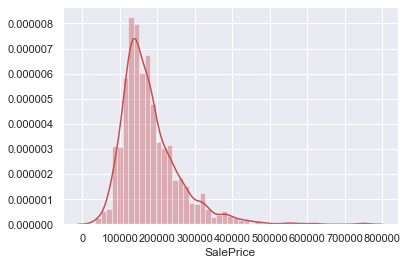

In [8]:
# visualisation of 'SalePrice' distribution
sns.distplot(df['SalePrice'], color='r')

# skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())


The plot above shows that the target variable 'SalePrice' is not normally distributed - it is skewed to the left and high kurtosis shows a heavy tail, or outliers.

This is a problem since most Machine Learning (ML) models don't do well with non-normally distributed data. 

This is just an observation but will be fixed further on.


#### Set 'Id' to index

'Id' also needs to be dropped since it does not consist of important data we need in ML process.

In [9]:
# set 'Id' to index
df = df.set_index('Id')

### Missing Data

As had been noticed before at **data.info()**, our dataset contains a lot of missing data presented as NaN values.
Firstly, these NaN values have to be found.

#### List of data features with missing values (visualisation: bartplot)

In [10]:
# list of features with missing values
total = \
    df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False)
        != 0]
percent = round(df.isnull().sum().sort_values(ascending=False)
                / len(df) * 100,
                2)[round(df.isnull().sum().sort_values(ascending=False)
                   / len(df) * 100, 2) != 0]
missing_data = pd.concat([total, percent], axis=1, keys=['Total',
                         'Percent'])
missing_data

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageCond,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55


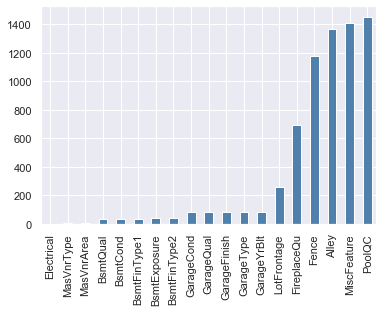

In [11]:
# visualisation of fields with missing values
sns.set_style('darkgrid')

missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='#5081ac')

In [12]:
# columns which have NaN values 
nan_columns = [i for i in df.columns if df[i].isnull().any()]
print("There are " + str(len(nan_columns)) +" columns with NaN values for 1460 rows.")
nan_columns

There are 19 columns with NaN values for 1460 rows.


['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']


Looking at the _'data_description'_ file and our 'dataset.csv' file it can be seen that a lot of the NaNs 
are not true missing values, but rather indicate that the property does not
have that feature. For example, a property with NaN 'GarageType' has no garage.

This information has to be preserved.
So NaNs will be replaced with the string 'None' in the Categorical features, and with 'mean' or 0 for the Numeric features, where this applies.

#### Filling missing values

Fields where NaN values have meaning - all these fields are Categorical features.

Explaining in further depth:

* 'Alley': Type of alley access to property - No alley access
* 'BsmtQua'l:  Evaluates the height of the basement - No Basement
* 'BsmtCond':  Evaluates the general condition of the basement - No Basement
* 'BsmtExposure': Refers to walkout or garden level walls - No Basement
* 'BsmtFinType1': Rating of basement finished area - No Basement
* 'BsmtFinType'2: Rating of basement finished area - No Basement
* 'FireplaceQu':  Fireplace quality - No Fireplace
* 'GarageType':   Garage location - No Garage
* 'GarageFinish': Interior finish of the garage - No Garage
* 'GarageQual':   Garage quality - No Garage
* 'GarageCond':   Garage condition - No Garage
* 'PoolQC':       Pool quality - No Pool
* 'Fence':        Fence quality - No Fence
* 'MiscFeature':  Miscellaneous feature not covered in other categories - None
* 'MasVnrType':   Masonry veneer type - None

'Electrical' is a special case: in the _'data_description.txt'_ file it is a Categorical feature that does not have meaning for NaN value, 
but in the _'dataset.csv'_ file we can find 1 NaN - missing value. I made a decision to replace NaN with 'None' since it is Categorical feature.

In [13]:
# NaN columns to fill in Categorical Features
nan_cat_columns_fill = [
    'PoolQC',
    'MiscFeature',
    'Alley',
    'Fence',
    'MasVnrType',
    'FireplaceQu',
    'GarageQual',
    'GarageCond',
    'GarageFinish',
    'GarageType',
    'BsmtExposure',
    'BsmtCond',
    'BsmtQual',
    'BsmtFinType1',
    'BsmtFinType2',
    'Electrical',
    ]
print('There are ' + str(len(nan_cat_columns_fill)) + ' columns with NaN values for 1460 rows.')

There are 16 columns with NaN values for 1460 rows.


In [14]:
# replace 'NaN' with 'None' in these columns
for col in nan_cat_columns_fill:
    df[col].fillna('None',inplace=True)

In [15]:
# recalculation of columns with NaN values 
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
nan_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
nan_columns.head()

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
SalePrice,0,0.000000
Foundation,0,0.000000


**'LotFrontage', 'GarageYrBl't** and **'MasVnrArea'** are a Numerical features with NaN values. **'LotFrontage'** and **'MasVnrArea'** will be filled with 'mean' and for **'GarageYrBl't** '0' will be applied for filling.

In [16]:
# fillna with 'mean' for 'LotFrontage' and 'MasVnrArea' columns
nan_num_columns_fill = [
    'LotFrontage',
    'MasVnrArea' 
    ]

# replace 'NAN' with 'mean' in these columns
df.fillna(df.mean(), inplace = True) 

# replace 'NAN' with '0' in 'GarageYrBlt' column
df['GarageYrBlt'].fillna(0, inplace=True)

Missing data will be now checked again.

In [17]:
df.isnull().sum().sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 no

The above list shows no new Missing data therefore this is complete.

Next is to observe Numerical and Categorical features.

### Numerical and Categorical features
#### List of Numerical and Categorical features

In [19]:
# check for Numerical and Categorical features
numerical_feats = df.dtypes[df.dtypes != 'object'].index
print ('Quantity of Numerical features: ', len(numerical_feats))
print ()
print (df[numerical_feats].columns)
print ()
categorical_feats = df.dtypes[df.dtypes == 'object'].index
print ('Quantity of Categorical features: ', len(categorical_feats))
print ()
print (df[categorical_feats].columns)

Quantity of Numerical features:  37

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Quantity of Categorical features:  43

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCon

#### Numerical features:

In [20]:
# preview of the first 5 lines of the Numerical features
df[numerical_feats].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


#### Visualisation  of Numerical features (regplot)

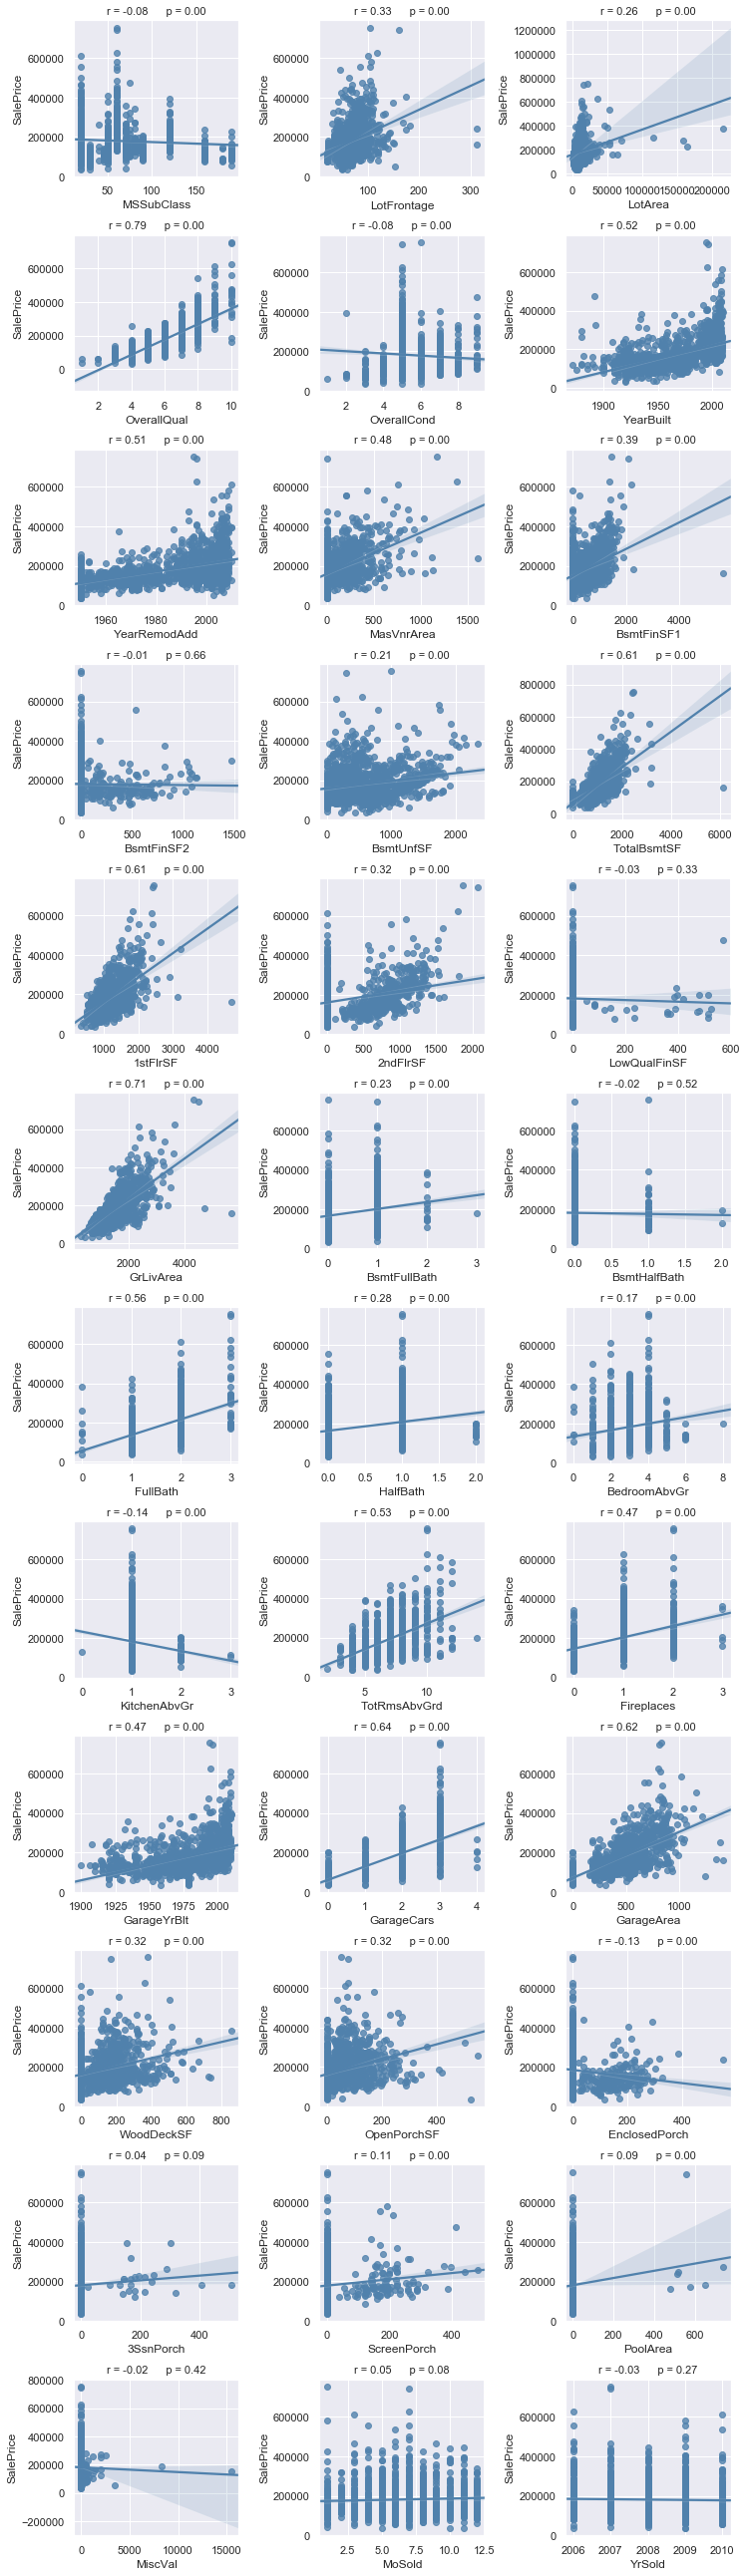

In [21]:
# visualisation of Numerical features
nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

num_feats = list(numerical_feats)
not_plot = ['Id',  'SalePrice']
plot_num_feats = [c for c in list(numerical_feats) if c not in not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols + c
        if i < len(plot_num_feats):
            sns.regplot(df[plot_num_feats[i]], df['SalePrice'], ax = axs[r][c], color = "#5081ac" )
            stp = stats.pearsonr(df[plot_num_feats[i]], df['SalePrice'])
          
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title, fontsize=11)



plt.tight_layout()    
plt.show()



Plot shows that some Numerical features (including target 'SalePrice') does not have a normal distribution so 
these should be transformed.
Before doing this, outliers have to be dealt with.

#### Outliers (visualisation: scatter plot)


'GrLivArea' feature has an inconsistency.
It is possible that houses with a living area around 4500 square meters could cost more than 700000.
But that houses with a living area around 4700 and 5800 square meters could cost less than 200000 - this seems strange.
Therefore it has been decided to drop these two inconsistencies.

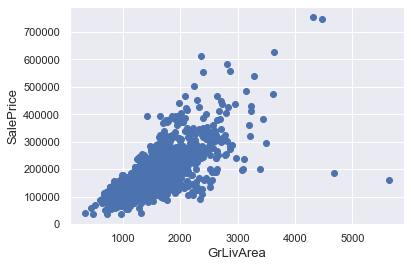

In [22]:
# plot showing 'GrLivArea' outliers
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('GrLivArea', fontsize = 13)
plt.show()

In [23]:
# drop of outliers
df = df.drop(
    df[(df['GrLivArea'] >4500) & (df['SalePrice'] <200000)].index)

'OverallQual' feature have an inconsistancy.
Houses with 'Very Excellent' condition can not cost less than 200000.
So, I decided to drop this 2 inconsistatcies.

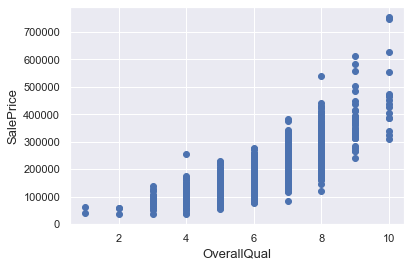

In [24]:
# plot showing 'GrLivArea' outliers
fig, ax = plt.subplots()
ax.scatter(x = df['OverallQual'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('OverallQual', fontsize = 13)
plt.show()

In [25]:
# drop of outliers
df = df.drop(
    df[(df['OverallQual'] == 10.0) & (df['SalePrice'] <220000)].index)

Outliers are complete.

#### List of Numerical features with strong and weak correlation to target

Columns with strong and weak correlation to target need to be found. As was presented in **Part 0 - Settings** 'minimum correlation value' equal 0.4.
 

In [26]:
corr = df.corr()
corr_abs = corr.abs()

num_cols = len(numerical_feats)
num_corr = corr_abs.nlargest(num_cols, 'SalePrice')['SalePrice']

cols_abv_corr_limit = list(num_corr[num_corr.values > min_value_corr].index)
cols_blw_corr_limit = list(num_corr[num_corr.values <= min_value_corr].index)


In [27]:
# list of Numerical features and their correlation coefficient to target
print(num_corr)
print()
print("Numerical features with correlation above min value :")
print(cols_abv_corr_limit)
print()
print("Numerical features with correlation below min value :")
print(cols_blw_corr_limit)

SalePrice        1.000000
OverallQual      0.795774
GrLivArea        0.734968
TotalBsmtSF      0.651153
GarageCars       0.641047
1stFlrSF         0.631530
GarageArea       0.629217
FullBath         0.562165
TotRmsAbvGrd     0.537769
YearBuilt        0.523608
YearRemodAdd     0.507717
MasVnrArea       0.480463
GarageYrBlt      0.470844
Fireplaces       0.469862
BsmtFinSF1       0.409384
LotFrontage      0.352798
WoodDeckSF       0.324758
OpenPorchSF      0.321142
2ndFlrSF         0.320532
HalfBath         0.284590
LotArea          0.268179
BsmtFullBath     0.228459
BsmtUnfSF        0.214460
BedroomAbvGr     0.168245
KitchenAbvGr     0.135946
EnclosedPorch    0.128646
ScreenPorch      0.111415
PoolArea         0.099490
MSSubClass       0.084276
OverallCond      0.077948
MoSold           0.046124
3SsnPorch        0.044568
YrSold           0.028882
LowQualFinSF     0.025625
MiscVal          0.021203
BsmtHalfBath     0.016881
BsmtFinSF2       0.011422
Name: SalePrice, dtype: float64

Numer

#### Skewness and Kurtosis calculations 

Returning to Numerical features transformation.
Starting with a check for _'skewness'_ and _'kurtosis'_.

In [28]:
# 'skewness' and 'kurtosis' of numerical features
for col in numerical_feats:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df[col].kurt())  
         )

MSSubClass      Skewness: 01.41     Kurtosis: 001.57
LotFrontage     Skewness: 01.69     Kurtosis: 014.64
LotArea         Skewness: 12.57     Kurtosis: 213.59
OverallQual     Skewness: 00.20     Kurtosis: 000.07
OverallCond     Skewness: 00.69     Kurtosis: 001.10
YearBuilt       Skewness: -0.61     Kurtosis: -00.44
YearRemodAdd    Skewness: -0.50     Kurtosis: -01.27
MasVnrArea      Skewness: 02.70     Kurtosis: 010.43
BsmtFinSF1      Skewness: 00.76     Kurtosis: -00.11
BsmtFinSF2      Skewness: 04.25     Kurtosis: 020.08
BsmtUnfSF       Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF     Skewness: 00.51     Kurtosis: 001.77
1stFlrSF        Skewness: 00.89     Kurtosis: 001.12
2ndFlrSF        Skewness: 00.81     Kurtosis: -00.56
LowQualFinSF    Skewness: 09.00     Kurtosis: 083.11
GrLivArea       Skewness: 01.01     Kurtosis: 002.06
BsmtFullBath    Skewness: 00.59     Kurtosis: -00.86
BsmtHalfBath    Skewness: 04.10     Kurtosis: 016.37
FullBath        Skewness: 00.03     Kurtosis: 

The list above is heavily populated with numbers. To aid understanding for analysis purposes, the data will now be portrayed in graphical plot below.

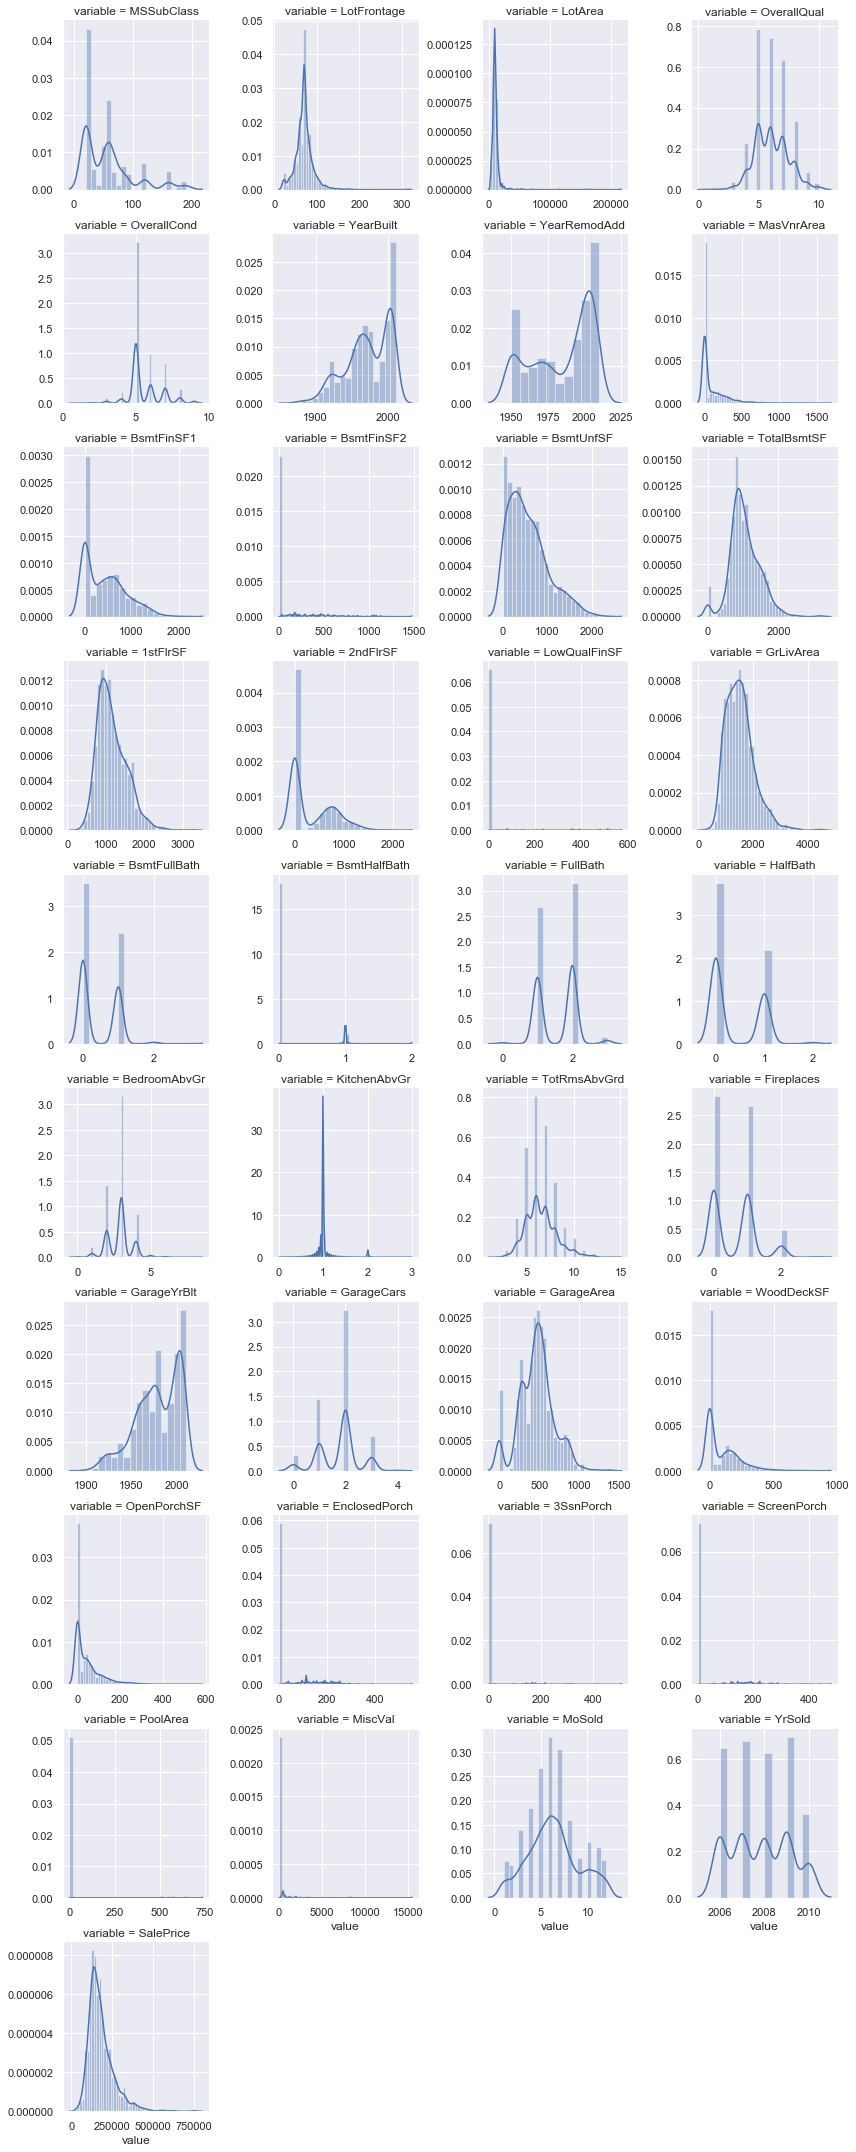

In [29]:
# visualisation of Numeric features after 'skewness' and 'kurtosis'
f = pd.melt(df, value_vars=numerical_feats)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

The overall picture is more clear.

It shows that target 'SalePrice' needs to be distributed.
It shows that 'GrLivArea' is numerically the closest feature to the target.

Therefore **'log'** transformation will be applied to both. 

#### Log transformation of target variable 'SalePrice' and 'GrLivArea' (visualisation: distplot)


As was seen earlier, the target variable 'SalePrice' is not normally distributed - it was skewed to the left 
and high kurtosis showed a heavy tail, or outliers. 
This is a problem because most ML models don't do well with non-normally distributed data. 


Skewness: 1.881296
Kurtosis: 6.523067


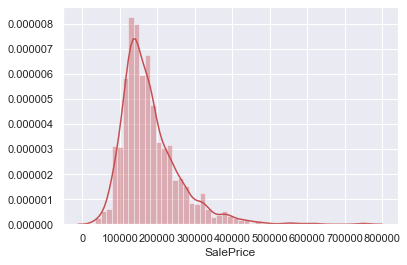

In [30]:
# visualisation of 'SalePrice' distribution
sns.distplot(df['SalePrice'], color = "r");

# skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

**'log'** needs to be applied in order to have a better distribution.

Skewness: 0.121568
Kurtosis: 0.804764


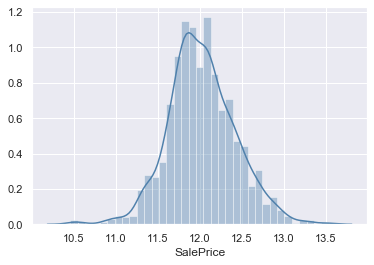

In [31]:
# apply 'log' to 'SalePrice' 
df['SalePrice'] = np.log(df['SalePrice'])

#visualisation of 'SalePrice' distribution
sns.distplot(df['SalePrice'], color = "#5081ac");

# skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

The SalePrice is now normally distributed.
The same procedure will be repeated with 'GrLivArea'.

Skewness: 1.010992
Kurtosis: 2.063463


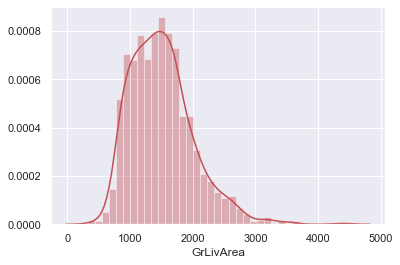

In [32]:
# visualisation of 'GrLivArea' distribution
sns.distplot(df['GrLivArea'], color= 'r');

# skewness and kurtosis
print("Skewness: %f" % df['GrLivArea'].skew())
print("Kurtosis: %f" % df['GrLivArea'].kurt())

Skewness: -0.071819
Kurtosis: 0.096331


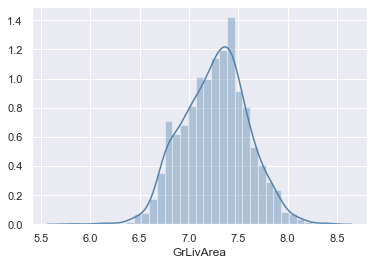

In [33]:
# apply 'log' to 'GrLivArea' 
df['GrLivArea'] = np.log(df['GrLivArea'])

# visualisation of 'GrLivArea' distribution
sns.distplot(df['GrLivArea'], color = "#5081ac");

# skewness and kurtosis
print("Skewness: %f" % df['GrLivArea'].skew())
print("Kurtosis: %f" % df['GrLivArea'].kurt())

#### Recalculation of Numerical features with strong and weak correlation to target

Next, Numerical features with strong and weak correlation to target, need to be recalculated.

In [34]:
corr = df.corr()
corr_abs = corr.abs()

num_cols = len(numerical_feats)
num_corr = corr_abs.nlargest(num_cols, 'SalePrice')['SalePrice']

cols_abv_corr_limit = list(num_corr[num_corr.values > min_value_corr].index)
cols_blw_corr_limit = list(num_corr[num_corr.values <= min_value_corr].index)

In [35]:
# list of Numerical features and their correlation coefficient to target
print(num_corr)
print()
print("Numerical features with correlation above min value :")
print(cols_abv_corr_limit)
print()
print("Numerical features with correlation below min value :")
print(cols_blw_corr_limit)

SalePrice        1.000000
OverallQual      0.821404
GrLivArea        0.737427
GarageCars       0.681033
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
BsmtFinSF1       0.392283
LotFrontage      0.352432
WoodDeckSF       0.334250
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
LotArea          0.260544
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209036
EnclosedPorch    0.149029
KitchenAbvGr     0.147534
ScreenPorch      0.121245
PoolArea         0.074338
MSSubClass       0.073969
MoSold           0.057064
3SsnPorch        0.054914
LowQualFinSF     0.037951
YrSold           0.037151
OverallCond      0.036821
MiscVal          0.020012
BsmtHalfBath     0.005124
BsmtFinSF2       0.004863
Name: SalePrice, dtype: float64

Numer

#### Drop Numerical features with weak correlation

Only those Numerical features with strong correlation will be used in the ML process later.

Features with weak correlation will be deleted.

In [36]:
# drop of Numerical features with week correlation to target
cols_to_drop = cols_blw_corr_limit 

for df in [df]:
    df.drop(cols_to_drop, inplace = True, axis = 1)

Next, the quantity of Numerical features and their names will presented.

In [37]:
# check for Numerical features
numerical_feats = df.dtypes[df.dtypes != "object"].index
print("Quantity of Numerical features: ", len(numerical_feats))
print()
print(df[numerical_feats].columns)

Quantity of Numerical features:  14

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')


#### Visualisation of Numerical features with the strongest correlation to target (visualisation: heatmap)

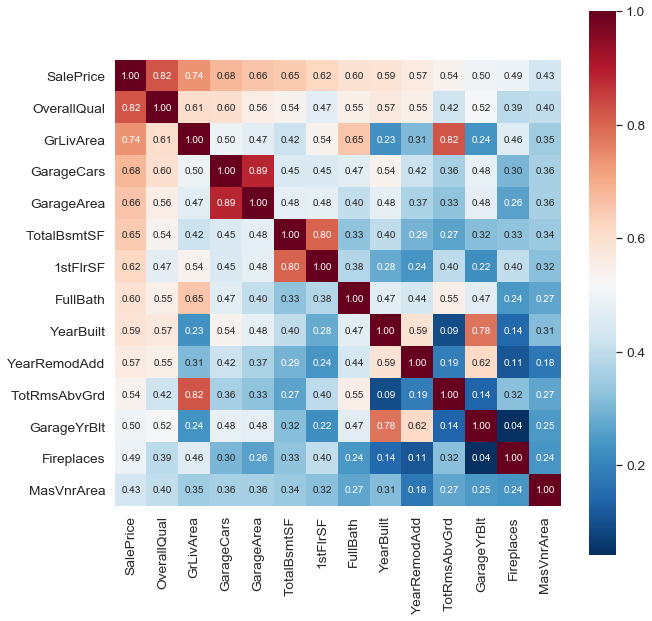

In [38]:
# correlation matrix for 14 numerical features with the strongest correlation to target
k = 14 # number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.25)
f, ax = plt.subplots(figsize = (10, 10))
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', \
                 annot_kws = {'size': 10}, cmap = 'RdBu_r', yticklabels = cols.values, xticklabels = cols.values)
plt.show()

At this level, the 'leader' with the strongest correlation to target in Numerical features is: **'OverallQual'**.

But Categorical features still need to be analysed. The leadership can be changed.

Numerical features is now complete, and next is Categorical features.


#### Categorical Features:


Next is to observe Categorical features.

In [39]:
# preview of the first 5 lines of the Categorical features
df[categorical_feats].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
4,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
5,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


#### Visualisation of Categorical features (boxplot)


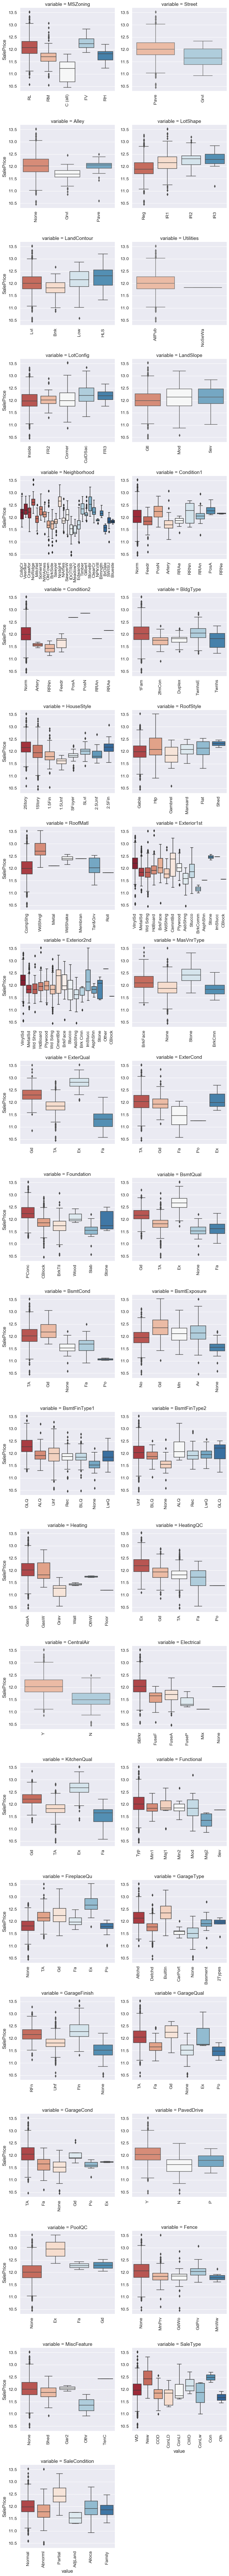

In [40]:
# visualisation of Categorical features
for c in categorical_feats:
    df[c] = df[c].astype('category')
    if df[c].isnull().any():
        df[c] = df[c].fillna('None')

def boxplot(x, y, **kwargs):
    sns.boxplot(x = x, y = y, palette = 'RdBu')
    x = plt.xticks(rotation = 90)
f = pd.melt(df, id_vars = ['SalePrice'], value_vars = categorical_feats)
g = sns.FacetGrid(f, col = "variable",  col_wrap = 2, sharex = False, sharey = False, height = 5 )
g = g.map(boxplot, "value", "SalePrice")

#### Visualisation of Categorical features with a strong correlation to the target (barplot)

Visualisation will be applied in order to investigate the relation of the Categorical features to the target in more detail.
Also, we look at the 'mean' of 'SalePrice' as function of category.

The analysis of variance or ANOVA is a statistical inference test that lets you compare multiple groups at the same time.

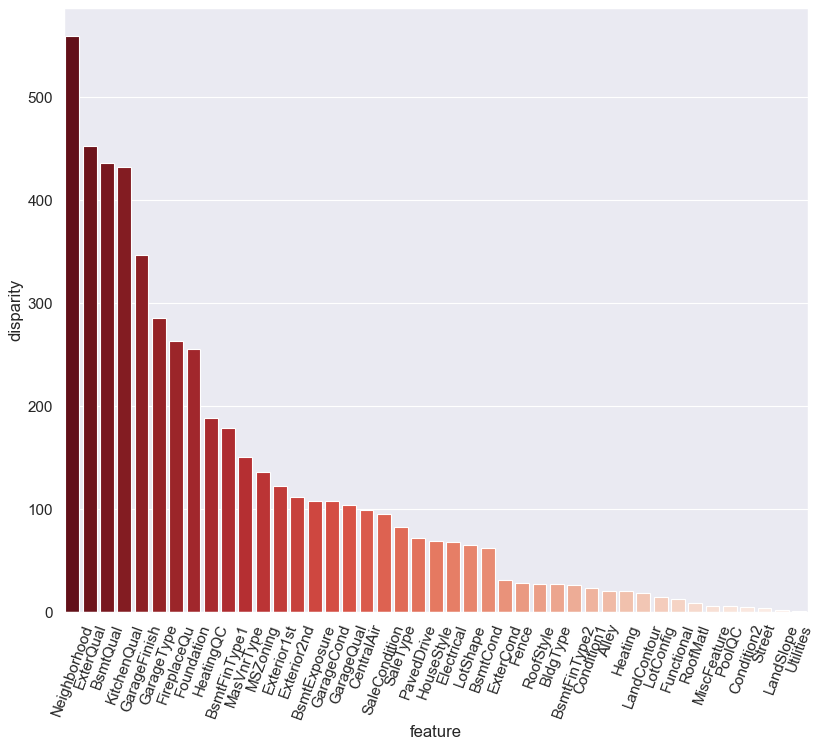

In [41]:
# visualisation of Categorical features and its correlation to the target variable. 
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = categorical_feats
    pvals = []
    for c in categorical_feats:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

plt.figure(figsize=(12,10), dpi= 80)

a = anova(df)
a['disparity'] = np.log(1. / a['pval'].values)
sns.barplot(data = a, x = 'feature', y = 'disparity', palette = 'Reds_r')
x = plt.xticks(rotation=70) 

Plot shows that number of features (like 'Neighborhood_E', 'ExterQual_E', 'BsmtQual_E', 'KitchenQual_E') 
have a strong correlation to 'SalePrice'.

At this level, the 'leader' with the strongest correlation to target in Categorical features is: **'Neighborhood_E'**

#### Convert Categorical into Numerical features 

In order to analyse and perform multicollinearity with Categorical features as well (and use them later for ML process) they will be converted into Numerical.

In [42]:
# encode categorical into numerical features
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0] + 1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature +'_E'] = o
    
categorical_encod = []
for q in categorical_feats:  
    encode(df, q)
    categorical_encod.append(q +'_E')

print("Quantity of Encoded Categorical features: ", len(categorical_encod))
print()
print(df[categorical_encod].columns)

Quantity of Encoded Categorical features:  43

Index(['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E',
       'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E',
       'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E',
       'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E',
       'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E',
       'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E',
       'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E',
       'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E',
       'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E',
       'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E',
       'SaleCondition_E'],
      dtype='object')


In [43]:
# preview of the first 5 lines of the Categorical features 
df[categorical_encod].head()

,MSZoning_E,Street_E,Alley_E,LotShape_E,LandContour_E,Utilities_E,LotConfig_E,LandSlope_E,Neighborhood_E,Condition1_E,...,GarageType_E,GarageFinish_E,GarageQual_E,GarageCond_E,PavedDrive_E,PoolQC_E,Fence_E,MiscFeature_E,SaleType_E,SaleCondition_E
Id,,,,,,,,,,,,,,,,,,,,,
1,4.0,2.0,3.0,1.0,2.0,2.0,1.0,1.0,16.0,4.0,...,6.0,3.0,4.0,6.0,3.0,1.0,5.0,3.0,5.0,5.0
2,4.0,2.0,3.0,1.0,2.0,2.0,3.0,1.0,21.0,2.0,...,6.0,3.0,4.0,6.0,3.0,1.0,5.0,3.0,5.0,5.0
3,4.0,2.0,3.0,2.0,2.0,2.0,1.0,1.0,16.0,4.0,...,6.0,3.0,4.0,6.0,3.0,1.0,5.0,3.0,5.0,5.0
4,4.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,18.0,4.0,...,3.0,2.0,4.0,6.0,3.0,1.0,5.0,3.0,5.0,2.0
5,4.0,2.0,3.0,2.0,2.0,2.0,3.0,1.0,25.0,4.0,...,6.0,3.0,4.0,6.0,3.0,1.0,5.0,3.0,5.0,5.0


#### Drop all Categorical features 

Now with new Encoded Categorical we can drop the old Categorical features.

In [44]:
# drop old (not encoded) Categorical features
cols_to_drop   = categorical_feats

for df in [df]:
    df.drop(cols_to_drop, inplace = True, axis = 1)

#### List of all data features (Numerical and Encoded Categorical) with strong and weak correlation to target

Next, columns with strong and weak correlation to target in all data features (Numerical and Encoded Categorical) have to be found.

In [45]:
corr = df.corr()
corr_abs = corr.abs()

num_cols = len(df)
num_corr = corr_abs.nlargest(num_cols, 'SalePrice')['SalePrice']

cols_abv_corr_limit = list(num_corr[num_corr.values > min_value_corr].index)
cols_blw_corr_limit = list(num_corr[num_corr.values <= min_value_corr].index)

In [46]:
# list of all data features (Numerical and Encoded Categorical) and their correlation to target
print(num_corr)
print()
print("Numerical features with correlation above min value :")
print(cols_abv_corr_limit)
print()
print("Numerical features with correlation below min value :")
print(cols_blw_corr_limit)

SalePrice          1.000000
OverallQual        0.821404
Neighborhood_E     0.743358
GrLivArea          0.737427
ExterQual_E        0.682225
GarageCars         0.681033
KitchenQual_E      0.669989
GarageArea         0.656128
BsmtQual_E         0.649133
TotalBsmtSF        0.647563
1stFlrSF           0.620500
GarageFinish_E     0.605602
FullBath           0.595899
YearBuilt          0.587043
GarageType_E       0.575844
YearRemodAdd       0.565992
Foundation_E       0.550759
FireplaceQu_E      0.547630
TotRmsAbvGrd       0.537702
GarageYrBlt        0.500842
Fireplaces         0.491998
HeatingQC_E        0.473938
MasVnrArea         0.433353
MasVnrType_E       0.431651
MSZoning_E         0.410584
Exterior1st_E      0.410457
Exterior2nd_E      0.402901
BsmtFinType1_E     0.396868
GarageCond_E       0.377614
BsmtExposure_E     0.358410
GarageQual_E       0.358358
CentralAir_E       0.351598
SaleType_E         0.344056
HouseStyle_E       0.315180
Electrical_E       0.309378
PavedDrive_E       0

#### Drop all data features with weak correlation

Only those features with strong correlation will be used in the ML testing later.

The features with weak correlation will be deleted.

In [47]:
# drop of data features (Numerical and Encoded Categorical) with weak correlation
all_cols = len(df)
num_corr = corr_abs.nlargest(all_cols, 'SalePrice')['SalePrice']

cols_blw_corr_limit = list(num_corr[num_corr.values <= min_value_corr].index)

for df in [df] :
    
    df.drop(cols_blw_corr_limit, inplace= True, axis = 1) 

#### List of all data features with strong correlation to target

Next, probable candidate features for ML process have to be found.

In [48]:
# list of data features (Numerical and Encoded Categorical) with strong correlation to target
corr = df.corr()
corr_abs = corr.abs()

all_cols = len(df)
num_catenc_corr = corr_abs.nlargest(all_cols, 'SalePrice')['SalePrice']

print(num_catenc_corr)

SalePrice         1.000000
OverallQual       0.821404
Neighborhood_E    0.743358
GrLivArea         0.737427
ExterQual_E       0.682225
GarageCars        0.681033
KitchenQual_E     0.669989
GarageArea        0.656128
BsmtQual_E        0.649133
TotalBsmtSF       0.647563
1stFlrSF          0.620500
GarageFinish_E    0.605602
FullBath          0.595899
YearBuilt         0.587043
GarageType_E      0.575844
YearRemodAdd      0.565992
Foundation_E      0.550759
FireplaceQu_E     0.547630
TotRmsAbvGrd      0.537702
GarageYrBlt       0.500842
Fireplaces        0.491998
HeatingQC_E       0.473938
MasVnrArea        0.433353
MasVnrType_E      0.431651
MSZoning_E        0.410584
Exterior1st_E     0.410457
Exterior2nd_E     0.402901
Name: SalePrice, dtype: float64


In [49]:
num_catenc_corr = df.dtypes[df.dtypes != "object"].index
print ("Quantity of new df features: Numerical + Encoded Categorical:", len(num_catenc_corr))

Quantity of new df features: Numerical + Encoded Categorical: 27


In [50]:
# preview of the first 5 lines of data features (Numerical and Encoded Categorical)
df.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,...,Exterior2nd_E,MasVnrType_E,ExterQual_E,Foundation_E,BsmtQual_E,HeatingQC_E,KitchenQual_E,FireplaceQu_E,GarageType_E,GarageFinish_E
Id,,,,,,,,,,,,,,,,,,,,,
1,7,2003,2003,196.0,856,856,7.444249,2,8,0,...,14.0,3.0,3.0,6.0,4.0,5.0,3.0,2.0,6.0,3.0
2,6,1976,1976,0.0,1262,1262,7.140453,2,6,1,...,7.0,2.0,2.0,3.0,4.0,5.0,2.0,4.0,6.0,3.0
3,7,2001,2002,162.0,920,920,7.487734,2,6,1,...,14.0,3.0,3.0,6.0,4.0,5.0,3.0,4.0,6.0,3.0
4,7,1915,1970,0.0,756,961,7.448334,1,7,1,...,8.0,2.0,2.0,2.0,3.0,4.0,3.0,5.0,3.0,2.0
5,8,2000,2000,350.0,1145,1145,7.695303,2,9,1,...,14.0,3.0,3.0,6.0,4.0,5.0,3.0,4.0,6.0,3.0


#### Visualisation of all data features with strong correlation to target (heatmap)

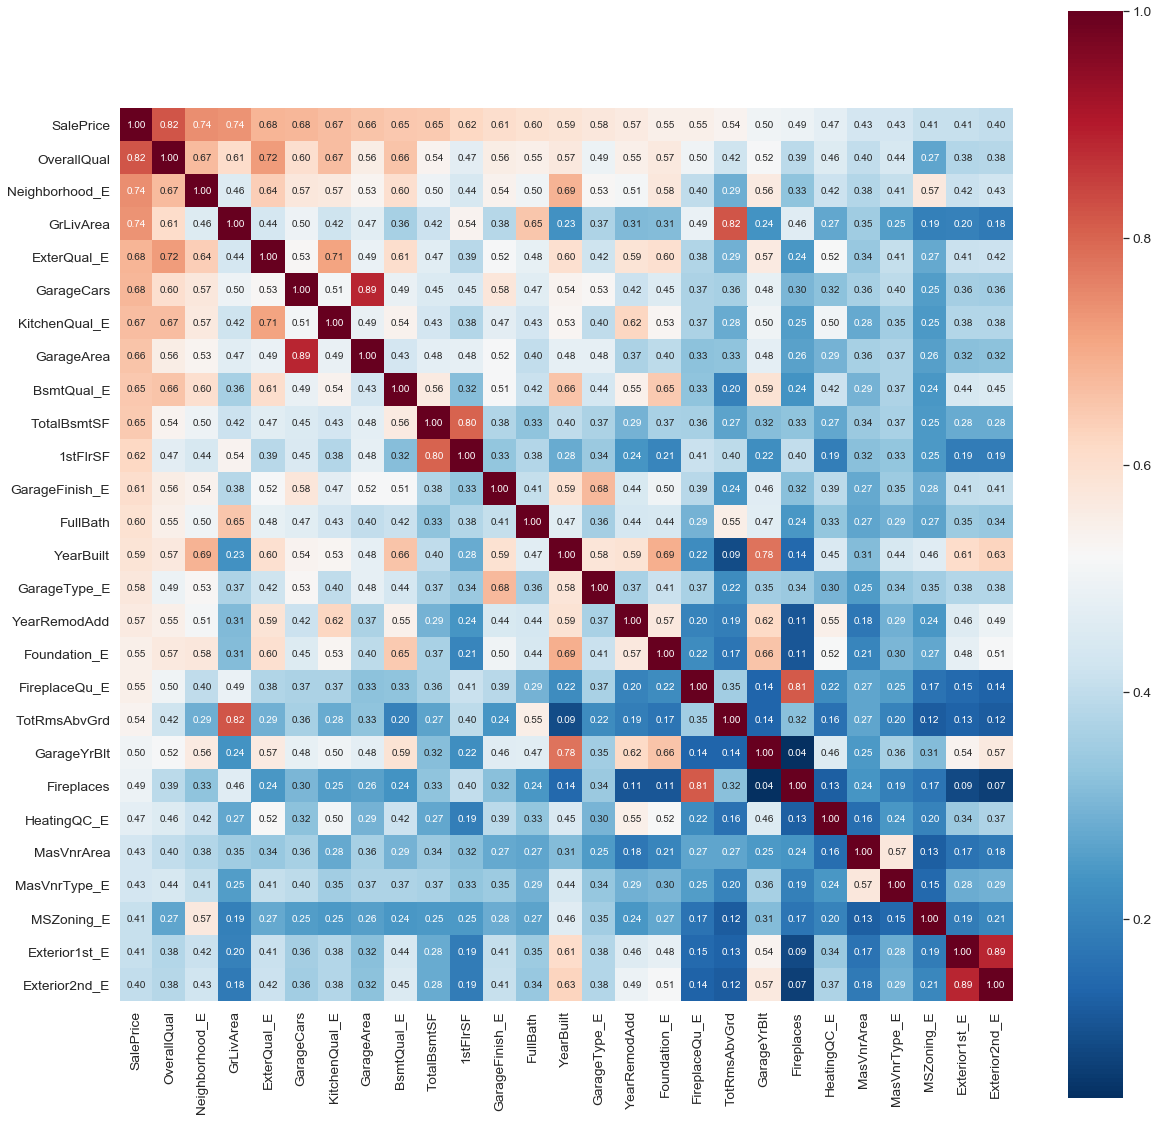

In [51]:
# correlation matrix for 27 features with the strongest correlation to target
k = 27  # number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
(f, ax) = plt.subplots(figsize=(20, 20))
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 10},
    cmap='RdBu_r',
    yticklabels=cols.values,
    xticklabels=cols.values,
    )
plt.show()

**27** probable candidate features for ML Part, have been found. These candidate features are only probable for now. 

One further step called **Multicollineality**, needs to be performed in order to create a final list of features for ML testing.

# Part 2: Data Wrangling and Transformation.
### Multicollinearity


**Multicollinearity** refers to predictors that are correlated with other predictors. Multicollinearity occurs when your model includes multiple factors that are correlated not just to your response variable, but also to each other.

From the Correlation matrix above, a number of features with strong correlation to similar features, have been identified.

**GrivArea_Log and TotRmsAbvGrd**

**GarageCars and GarageArea**

**TotalBsmtSF and 1stFlrSF**

**YearBuilt and GarageYrBlt**

**FireplaceQu_E and Fireplaces**

**Exterior1st_E and Exterior2nd_E**

In order to avoid Multicollineality, one of the paired features that has smaller correlation coeffiecient to target 
needs to be dropped.

These are: **'TotRmsAbvGrd', 'GarageArea', '1stFlrSF', 'GarageYrBlt', 'Fireplaces', 'Exterior2nd_E'.**

In [52]:
# features to drop after Multicollinearity
cols_to_drop = [
    'TotRmsAbvGrd',
    'GarageArea',
    '1stFlrSF',
    'GarageYrBlt',
    'Fireplaces',
    'Exterior2nd_E',
    ]

for df in [df]:
    df.drop(cols_to_drop, inplace=True, axis=1)

Next, is to check what features are left over after drop.

In [53]:
# observe what features left in dataset
cols = list(df)
print(cols)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageCars', 'SalePrice', 'MSZoning_E', 'Neighborhood_E', 'Exterior1st_E', 'MasVnrType_E', 'ExterQual_E', 'Foundation_E', 'BsmtQual_E', 'HeatingQC_E', 'KitchenQual_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E']


In [54]:
# list of data features (Numerical and Encoded Categorical) with strong correlation to target 
corr = df.corr()
corr_abs = corr.abs()

all_cols = len(df)
num_catenc_corr = corr_abs.nlargest(all_cols, 'SalePrice')['SalePrice']

print(num_catenc_corr)

SalePrice         1.000000
OverallQual       0.821404
Neighborhood_E    0.743358
GrLivArea         0.737427
ExterQual_E       0.682225
GarageCars        0.681033
KitchenQual_E     0.669989
BsmtQual_E        0.649133
TotalBsmtSF       0.647563
GarageFinish_E    0.605602
FullBath          0.595899
YearBuilt         0.587043
GarageType_E      0.575844
YearRemodAdd      0.565992
Foundation_E      0.550759
FireplaceQu_E     0.547630
HeatingQC_E       0.473938
MasVnrArea        0.433353
MasVnrType_E      0.431651
MSZoning_E        0.410584
Exterior1st_E     0.410457
Name: SalePrice, dtype: float64


At this point the answer for **Contribution 1 Primary Task** can be stated:

**_Which single field in dataset.csv best describes the SalePrice field?_** 
    
       Numerical feature 'OverallQual'.
   
**_Why did you choose this field?_**
    
    After applying the statistical and analytical techniques above (such as: finding/filling missing data, finding/removing outliers, Skewness/Kurtosis calculations, Log transformation, calculation of strong and weak correlation to target, dropping unnecessary features, lots of visualisation, multicollineality), as a result of its calculations, 'OverallQual' field showed the highest correlation with the target 'SalePrice'. Therefore, it was choosen.
    

Next, the **target** 'SalePrice' has to be dropped. 
It was not done before, in order to transform, callibrate and prepare all data from the dataset for future ML process.

In [55]:
# drop the target 'SalePrice' 
new_df = df.drop(columns=['SalePrice'])

In [56]:
# print quantity and name of the features choosen for ML process
print ('Quantity of New features: ', len(new_df.columns))
print ()
print (new_df.columns)

Quantity of New features:  20

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       'GrLivArea', 'FullBath', 'GarageCars', 'MSZoning_E', 'Neighborhood_E',
       'Exterior1st_E', 'MasVnrType_E', 'ExterQual_E', 'Foundation_E',
       'BsmtQual_E', 'HeatingQC_E', 'KitchenQual_E', 'FireplaceQu_E',
       'GarageType_E', 'GarageFinish_E'],
      dtype='object')


20 data features were identified as candidates for the followng ML process.

### Dummys

A dummy variable is a numerical variable used in regression analysis to represent subgroups of the sample in a dataset.
Dummy variable values consist of 0 and 1, where the values indicate the presence or absence of something.

**'OverallQual', 'GarageCars'** and **'FullBath'** features with only whole numbers had been chosen to create a dummies.

In [57]:
# dummys
get_dummies = ['OverallQual', 'GarageCars', 'FullBath']
new_df = pd.get_dummies(new_df, columns=get_dummies)

In [58]:
# # preview of the first 5 lines of 'new_df' dataset
new_df.head()

,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,MSZoning_E,Neighborhood_E,Exterior1st_E,MasVnrType_E,ExterQual_E,...,OverallQual_10,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,FullBath_0,FullBath_1,FullBath_2,FullBath_3
Id,,,,,,,,,,,,,,,,,,,,,
1,2003,2003,196.0,856,7.444249,4.0,16.0,12.0,3.0,3.0,...,0,0,0,1,0,0,0,0,1,0
2,1976,1976,0.0,1262,7.140453,4.0,21.0,7.0,2.0,2.0,...,0,0,0,1,0,0,0,0,1,0
3,2001,2002,162.0,920,7.487734,4.0,16.0,12.0,3.0,3.0,...,0,0,0,1,0,0,0,0,1,0
4,1915,1970,0.0,756,7.448334,4.0,18.0,5.0,2.0,2.0,...,0,0,0,0,1,0,0,1,0,0
5,2000,2000,350.0,1145,7.695303,4.0,25.0,12.0,3.0,3.0,...,0,0,0,0,1,0,0,0,1,0


Dummies increased the data for ML testing from 20 up to 36 features. 

In [59]:
# shape of 'new_df' dataset
new_df.shape

(1458, 36)

### StandardScaler

Very important part is to **scale** the features in dataset. Especially, if later we will use **ML models** which **have Euclidean distance or Gradient descent**.

This is done so that the variance of the features are in the same range for better ML process. 

For now, StandardScaler will be applied, each column will have mean of **0** and standard deviation of **1**.

In [60]:
# apply StandardScaler
sc = StandardScaler()
new_df_sc = sc.fit_transform(new_df)

In [61]:
new_df_sc = pd.DataFrame(new_df_sc)
new_df_sc.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.052959,0.880362,0.521228,-0.473766,0.539624,0.359322,0.488590,0.960903,0.800218,1.061109,...,-0.105336,-0.242536,-0.582102,0.878389,-0.375293,-0.058661,-0.078811,-0.896914,0.949164,-0.149801
1,0.158428,-0.428115,-0.574433,0.504925,-0.380198,0.359322,1.269007,-0.844970,-0.703284,-0.689001,...,-0.105336,-0.242536,-0.582102,0.878389,-0.375293,-0.058661,-0.078811,-0.896914,0.949164,-0.149801
2,0.986698,0.831900,0.331164,-0.319490,0.671287,0.359322,0.488590,0.960903,0.800218,1.061109,...,-0.105336,-0.242536,-0.582102,0.878389,-0.375293,-0.058661,-0.078811,-0.896914,0.949164,-0.149801
3,-1.862551,-0.718888,-0.574433,-0.714823,0.551993,0.359322,0.800757,-1.567319,-0.703284,-0.689001,...,-0.105336,-0.242536,-0.582102,-1.138448,2.664583,-0.058661,-0.078811,1.114934,-1.053559,-0.149801
4,0.953567,0.734975,1.382104,0.222888,1.299759,0.359322,1.893341,0.960903,0.800218,1.061109,...,-0.105336,-0.242536,-0.582102,-1.138448,2.664583,-0.058661,-0.078811,-0.896914,0.949164,-0.149801


The whole dataset is now scaled.

In [62]:
# shape of 'new_df_sc' dataset
new_df_sc.shape

(1458, 36)

### Creating datasets for ML part

In [63]:
# set 'X' for features of scaled dataset 
X = new_df_sc.copy()

# set 'y' for the target 'SalePrice'
y = df['SalePrice']

### 'Train\Test' split

* Parameter __'test_size'__ represents the proportion of the dataset to include in the test split. 
* Parameter __'random_state'__ represents the seed used by the random number generator.

The dataset will be split in proportion 80/20. Train set = 80%, Test set = 20%.

In [64]:
# apply 'Train\Test' splitting method
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now our dataset split in four subsets: **X_train, X_test, y_train, and y_test**. 

* **X_train and X_test** represent **features**; 
* **y_train and y_test** represent **the target**; 
* **X_train and y_train** represent **training dataset**; 
* **X_test and y_test** represent **test dataset**.

In [65]:
# preview of the first 5 lines of X_train set
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
1170,-0.437926,-1.300433,-0.574433,0.502514,-0.382599,0.359322,-0.291827,-0.844970,-0.703284,-0.689001,...,-0.105336,-0.242536,-0.582102,0.878389,-0.375293,-0.058661,-0.078811,1.114934,-1.053559,-0.149801
75,0.059036,-0.573501,-0.574433,-1.423530,-1.121306,-2.153346,-1.696577,1.322077,-0.703284,-0.689001,...,-0.105336,-0.242536,1.717911,-1.138448,-0.375293,-0.058661,-0.078811,1.114934,-1.053559,-0.149801
390,-2.359513,-1.688130,-0.574433,-0.461713,-0.138217,0.359322,-1.072244,-0.844970,-0.703284,-0.689001,...,-0.105336,-0.242536,1.717911,-1.138448,-0.375293,-0.058661,-0.078811,1.114934,-1.053559,-0.149801
1282,-0.007226,-0.670426,-0.574433,-0.338774,0.735032,0.359322,-0.135743,-0.844970,-0.703284,-0.689001,...,-0.105336,4.123106,-0.582102,-1.138448,-0.375293,-0.058661,-0.078811,-0.896914,0.949164,-0.149801
682,1.019829,0.831900,0.627440,1.382371,0.464329,0.359322,0.488590,0.960903,2.303720,1.061109,...,-0.105336,-0.242536,-0.582102,-1.138448,2.664583,-0.058661,-0.078811,-0.896914,0.949164,-0.149801


In [66]:
X_train.shape

(1166, 36)

In [67]:
# preview of the first 5 lines of X_test set
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
411,-0.537319,-1.445819,-0.574433,0.008348,-0.919776,0.359322,0.332507,-1.567319,-0.703284,-0.689001,...,-0.105336,-0.242536,-0.582102,0.878389,-0.375293,-0.058661,-0.078811,1.114934,-1.053559,-0.149801
211,1.251744,1.171134,-0.574433,0.384396,-0.502599,0.359322,-1.072244,0.960903,-0.703284,-0.689001,...,-0.105336,-0.242536,-0.582102,0.878389,-0.375293,-0.058661,-0.078811,-0.896914,0.949164,-0.149801
342,-0.736104,-1.688130,1.326203,-2.537212,-0.966002,0.359322,-0.291827,-0.483796,0.800218,-0.689001,...,-0.105336,-0.242536,-0.582102,0.878389,-0.375293,-0.058661,-0.078811,-0.896914,0.949164,-0.149801
303,0.025905,-0.621964,-0.574433,-0.382164,-1.424013,0.359322,0.488590,0.960903,-0.703284,-0.689001,...,-0.105336,-0.242536,-0.582102,0.878389,-0.375293,-0.058661,-0.078811,1.114934,-1.053559,-0.149801
159,1.119221,1.025748,1.974655,0.818299,1.643187,0.359322,0.332507,0.960903,0.800218,1.061109,...,-0.105336,-0.242536,-0.582102,0.878389,-0.375293,-0.058661,-0.078811,-0.896914,0.949164,-0.149801


In [68]:
X_test.shape

(292, 36)

At this stage the data from _'dataset.csv'_ file is prepared and ready to applied for ML process.

# Answers to Initial Contribution:

At this point the answer for **Contribution 1 Primary Task** can be stated:

**_Which single field in dataset.csv best describes the SalePrice field?_** 
    
       Numerical feature 'OverallQual'.
   
**_Why did you choose this field?_**
    
    After applying the statistical and analytical techniques above (such as: finding/filling missing data, finding/removing outliers, Skewness/Kurtosis calculations, Log transformation, calculation of strong and weak correlation to target, dropping unnecessary features, lots of visualisation, multicollineality), as a result of its calculations, 'OverallQual' field showed the highest correlation with the target 'SalePrice'. Therefore, it was choosen.


## Contribution 2.


# Part 3: Machine Learning.

## Assumptions

* ### Regression Models

#### These Regression models will be used:
    
* Ridge
* Lasso 
* Elastic Net
* Decision Tree Regressor
* Random Forest Regressor
* Gradient Boosting Regressor

**Reason to choose these Regression models:**

* #### Ridge: 
    * Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. When multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from the true value. By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors.
    * No feature selection. Works great when there are many useful attributes in the dataset. Ridge compresses all attributes, but does not remove anything.
    * Uses L2 Regularization.
    * Ridge is used to quantify the overfitting of the data through measuring the magnitude of coefficients. 
    

* #### Lasso:
    * Lasso adds a penalty to coefficients the model overemphasizes. This reduces the degree of overfitting that occurs within the model.
    * Built-in feature selection.  Works great when there are many useless attributes in the dataset.Lasso selects only the necessary attributes and removes unnecessary ones.
    * Uses L1 Regularization.
    

* #### Elastic Net:
    * Elastic Net combines Ridge & Lasso to get the best of both models.
    * Elastic Net reduces the impact of different features while not eliminating all of the features.
    * Elastic Net aims to minimize the loss function.
    * Works especially well when there is correlation between attributes.
    
* #### Decision Tree Regressor:
    * Feature selection happens automatically: unimportant features will not influence the result. The presence of features that depend on each other (multicollinearity) also doesn't affect the quality.
    * Easy to understand and interpret, perfect for visual representation.

* #### Random Forest Regressor:
    * An ensamble method( it is a technique that create multiple models and then use them to produce better results).
    * It reduces overfitting in decision trees and helps to improve the accuracy.
    * It automates missing values present in the data.
    * Normalising of data is not required as it uses a rule-based approach.

* #### Gradient Boosting Regressor:
    * It is a Boosting algorithm (helps in reducing variance and bias in a machine learning ensemble; helps in the conversion of weak learners into strong learners by combining N number of learners.
    * It performs the optimization in function space (rather than in parameter space) which makes the use of custom loss functions much easier.
    * Focuses step by step on difficult examples that give a nice strategy to deal with unbalanced datasets by strengthening the impact of the positive class.
    *  Provides feature importance estimate.


* ### Metrics

These **metrics** will be used: 

* **Mean Abolute Error (MAE)** is the average of the absolute differences between the actual value and the model’s predicted value.

* **Mean Squared Error (MSE)**  is merely the average of the real value’s squared difference with the regression model’s predicted value.

* **Root Mean Squared Error (RMSE)** is the average root-squared difference between the real value and the predicted value.

* **Mean Squared Logarithmic Error (MSLE)**  is a measure of the ratio between the true and predicted values.

* **Root Mean Squared Logaritmic Error  (RMSLE)** measures the ratio between actual values and predicted values and takes the log (plus 1) of the predictions and actual values.

All of these are loss functions, ideally it need to be minimized. The smaller it is the better.

* **R Squared (R2)** represents the degree that the predicted value and the actual value. The closest to 1 the R², the better the regression model is. If R² is equal to 0, the model is not performing better than a random model. If R² is negative, the regression model is erroneous. The R-squared in this state varies between 0 and 1 where 0 represents no (linear) correlation between the predicted and actual value and 1 represents complete correlation.

* ### Cross-validation

I will use **Cross-validation** to test the model in the training phase in order to limit problems like overfitting, and get an insight on how the model will generalize to an independent data set.

* ### Hyper parameters

For search of the best **hyper parameters** for each model I will use **Scikit-Learn** https://scikit-learn.org/stable/index.html and **GridSearchCV()**. 

In [69]:
# scoring for GridSearchCV
score_calc = 'neg_mean_squared_error'

# number of folds in cross-validation
nr_cv = 5

# function to find the best score
def get_best_score(grid): 
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

# function for model in cross-validation
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=5)
    return pred.mean()

# function to evaluate metrics
def evaluate(true, predicted):
    r2_score = metrics.r2_score(true, predicted)
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    msle = metrics.mean_squared_log_error(true, predicted)
    rmsle = np.sqrt(metrics.mean_squared_log_error(true, predicted)) 
    return r2_score, mae, mse, rmse, msle, rmsle

## ML Regression Models

### Ridge

* **Hyper parameters:** _**alpha**_ - regularization strength; _**fit_intercept**_ - whether to fit the intercept for this model; _**normalize**_ ; _**solver**_ - what solver to use in the computational routines.

* **GrivSearchCV()** will be used to find **the best hyper parameters** for this model.

In [70]:
# initialisation of model parameters
parameters = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50], 
              'fit_intercept': [True, False], 
              'normalize':[True, False], 
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

# GridSearchCV
grid_Ridge = GridSearchCV(Ridge(), parameters, cv=nr_cv, verbose=1, n_jobs=2, scoring = score_calc)

# fit X_train and y_train
grid_Ridge.fit(X_train, y_train)

# print the best parameters
print("Best parameters:", grid_Ridge.best_params_)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 1226 tasks      | elapsed:    9.2s


Best parameters: {'alpha': 10, 'fit_intercept': True, 'normalize': False, 'solver': 'lsqr'}


[Parallel(n_jobs=2)]: Done 1400 out of 1400 | elapsed:    9.9s finished


The best **hyper parameters** are found. Now, our model with founded hyper parameters will be initialise, trained with 'X_train' and 'y_train' data, and finally predictions will be made with 'X_test' data.

In [71]:
# initialise Ridge model with new best parameters
ridge_model = Ridge(**grid_Ridge.best_params_)

# fit X_train and y_train
ridge_model.fit(X_train, y_train)

# model predictions
ridge_pred = ridge_model.predict(X_test)

Our model made a **predictions**. Now it is a time to visualise our **metrics** in table. 

In [72]:
# Model Metrics table
metrics_result = pd.DataFrame(data=[['Ridge', *evaluate(y_test, ridge_pred)]], 
                          columns=['Model', 'r2score', 'MAE', 'MSE', 'RMSE', 'MSLE', 'RMSLE'])

metrics_result

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
0,Ridge,0.892841,0.104453,0.018161,0.134762,0.000108,0.010385


### Lasso

* **Hyper parameters:** _**alpha**_ - constant that multiplies the L1 term; _**fit_intercept**_ - whether to fit the intercept for this model; _**normalize**_ ; _**tol**_ - the tolerance for the optimization.

* **GrivSearchCV()** will be used to find **the best hyper parameters** for this model.

In [73]:
# initialisation of model parameters
parameters = {'alpha':[0.0005,0.001,0.01,0.1,0.5,0.8,1],
              'fit_intercept': [True,False], 
              'normalize':[True,False], 
              'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}

# GridSearchCV
grid_Lasso = GridSearchCV(Lasso(), parameters, cv=nr_cv, verbose=1, n_jobs=2, scoring = score_calc)

# fit X_train and y_train
grid_Lasso.fit(X_train, y_train)

# print the best parameters
print("Best parameters:", grid_Lasso.best_params_)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 168 candidates, totalling 840 fits
Best parameters: {'alpha': 0.001, 'fit_intercept': True, 'normalize': False, 'tol': 0.001}


[Parallel(n_jobs=2)]: Done 840 out of 840 | elapsed:    2.7s finished


In [74]:
# initialise Lasso model with new best parameters
lasso_model = Lasso(**grid_Lasso.best_params_)

# fit X_train and y_train
lasso_model.fit(X_train, y_train)

# model predictions
lasso_pred = lasso_model.predict(X_test)

In [75]:
# Model Metrics table
metrics_result_2 = pd.DataFrame(data=[['Lasso', *evaluate(y_test, lasso_pred)]], 
                          columns=['Model', 'r2score', 'MAE', 'MSE', 'RMSE', 'MSLE', 'RMSLE'])

metrics_result = metrics_result.append(metrics_result_2, ignore_index=True)
metrics_result

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
0,Ridge,0.892841,0.104453,0.018161,0.134762,0.000108,0.010385
1,Lasso,0.890916,0.104964,0.018487,0.135967,0.000110,0.010495


### ElasticNet 

* **Hyper parameters:** _**alpha**_ - constant that multiplies the penalty terms; _**max_iter**_ - the maximum number of iterations, _**l1_ratio**_ - the ElasticNet mixing parameter, _**fit_intercept**_ - whether the intercept should be estimated or not; _**normalize**_ ; _**tol**_ - the tolerance for the optimization.

* **GrivSearchCV()** will be used to find **the best hyper parameters** for this model.

In [76]:
# initialisation of model parameters
parameters = {'alpha' :[0.1,1.0,10], 
              'max_iter' :[1000000], 
              'l1_ratio' :[0.01,0.05,0.1,0.5,1], 
              'fit_intercept' :[False,True], 
              'normalize' :[True,False], 
              'tol' :[1e-02,1e-03,1e-04]}

# GridSearchCV
grid_ElasticNet = GridSearchCV(ElasticNet(), parameters, cv=nr_cv, verbose=1, n_jobs=2, scoring = score_calc)

# fit X_train and y_train
grid_ElasticNet.fit(X_train,y_train)

# print the best parameters
print("Best parameters:", grid_ElasticNet.best_params_)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters: {'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.01, 'max_iter': 1000000, 'normalize': False, 'tol': 0.01}


[Parallel(n_jobs=2)]: Done 900 out of 900 | elapsed:    1.8s finished


In [77]:
# initialise Lasso model with new best parameters
enet_model = ElasticNet(**grid_ElasticNet.best_params_)

# fit X_train and y_train
enet_model.fit(X_train, y_train)

# model predictions
en_pred = enet_model.predict(X_test)

In [78]:
# Model Metrics table
metrics_result_2 = pd.DataFrame(data=[['Elastic Net', *evaluate(y_test, en_pred)]], 
                          columns=['Model', 'r2score', 'MAE', 'MSE', 'RMSE', 'MSLE', 'RMSLE'])

metrics_result = metrics_result.append(metrics_result_2, ignore_index=True)
metrics_result

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
0,Ridge,0.892841,0.104453,0.018161,0.134762,0.000108,0.010385
1,Lasso,0.890916,0.104964,0.018487,0.135967,0.000110,0.010495
2,Elastic Net,0.891215,0.103711,0.018436,0.135780,0.000110,0.010482


### Decision Tree Regressor

* **Hyper parameters:** _**max_depth**_ - the maximum depth of the tree; _**max_features**_ - the number of features to consider when looking for the best split, _**max_leaf_nodes**_ , _**min_samples_split**_ - the minimum number of samples required to split an internal node.

* **GrivSearchCV()** will be used to find **the best hyper parameters** for this model.

In [79]:
# initialisation of model parameters
parameters = {'max_depth' :[7,8,9,10], 
              'max_features' :[11,12,13,14],
              'max_leaf_nodes' :[None, 12,15,18,20],
              'min_samples_split' :[20,25,30]}

# GridSearchCV
grid_DecisionTreeRegressor = GridSearchCV(DecisionTreeRegressor(), parameters, cv=nr_cv, verbose=1, n_jobs=2, scoring = score_calc)

# fit X_train and y_train
grid_DecisionTreeRegressor.fit(X_train,y_train)

# print the best parameters
print("Best parameters:", grid_DecisionTreeRegressor.best_params_)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters: {'max_depth': 8, 'max_features': 11, 'max_leaf_nodes': None, 'min_samples_split': 20}


[Parallel(n_jobs=2)]: Done 1200 out of 1200 | elapsed:    2.7s finished


In [80]:
# initialise Lasso model with new best parameters
dtr_model = DecisionTreeRegressor(**grid_DecisionTreeRegressor.best_params_)

# fit X_train and y_train
dtr_model.fit(X_train, y_train)

# model predictions
dtr_pred = dtr_model.predict(X_test)

In [81]:
# Model Metrics table
metrics_result_2 = pd.DataFrame(data=[['Decision Tree Regressor', *evaluate(y_test, dtr_pred)]], 
                          columns=['Model', 'r2score', 'MAE', 'MSE', 'RMSE', 'MSLE', 'RMSLE'])

metrics_result = metrics_result.append(metrics_result_2, ignore_index=True)
metrics_result

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
0,Ridge,0.892841,0.104453,0.018161,0.134762,0.000108,0.010385
1,Lasso,0.890916,0.104964,0.018487,0.135967,0.000110,0.010495
2,Elastic Net,0.891215,0.103711,0.018436,0.135780,0.000110,0.010482
3,Decision Tree Regressor,0.720704,0.164812,0.047334,0.217563,0.000282,0.016789


### Random Forest Regressor

* **Hyper parameters:** _**max_depth**_ - the maximum depth of the tree; _**max_features**_ - the number of features to consider when looking for the best split, _**min_samples_leaf**_ - the minimum number of samples required to be at a leaf node , _**min_samples_split**_ - the minimum number of samples required to split an internal node, _**n_estimators**_ - the number of trees in the forest.

* **GrivSearchCV()** will be used to find **the best hyper parameters** for this model.

In [82]:
# initialisation of model parameters
parameters = {
    
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 250, 500]}

# GridSearchCV
grid_RandomForestRegressor = GridSearchCV(RandomForestRegressor(), parameters, cv=nr_cv, verbose=1, n_jobs=2, scoring = score_calc)

# fit X_train and y_train
grid_RandomForestRegressor.fit(X_train,y_train)

# print the best parameters
print("Best parameters:", grid_RandomForestRegressor.best_params_)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=2)]: Done 164 tasks      | elapsed:   20.6s
[Parallel(n_jobs=2)]: Done 464 tasks      | elapsed:   60.0s
[Parallel(n_jobs=2)]: Done 964 tasks      | elapsed:  2.1min
[Parallel(n_jobs=2)]: Done 1080 out of 1080 | elapsed:  2.3min finished


Best parameters: {'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500}


In [83]:
# initialise Lasso model with new best parameters
rfr_model = RandomForestRegressor(**grid_RandomForestRegressor.best_params_)

# fit X_train and y_train
rfr_model.fit(X_train, y_train)

# model predictions
rfr_pred = rfr_model.predict(X_test)

In [84]:
# Model Metrics table
metrics_result_2 = pd.DataFrame(data=[['Random Forest Regressor', *evaluate(y_test, rfr_pred)]], 
                          columns=['Model', 'r2score', 'MAE', 'MSE', 'RMSE', 'MSLE', 'RMSLE'])

metrics_result = metrics_result.append(metrics_result_2, ignore_index=True)
metrics_result

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
0,Ridge,0.892841,0.104453,0.018161,0.134762,0.000108,0.010385
1,Lasso,0.890916,0.104964,0.018487,0.135967,0.000110,0.010495
2,Elastic Net,0.891215,0.103711,0.018436,0.135780,0.000110,0.010482
3,Decision Tree Regressor,0.720704,0.164812,0.047334,0.217563,0.000282,0.016789
4,Random Forest Regressor,0.854808,0.111175,0.024606,0.156864,0.000148,0.012155


### Gradient Boosting Regressor

* **Hyper parameters:** _**n_estimators**_ - the number of boosting stages to perform; _**max_depth**_ - maximum depth of the individual regression estimators, _**min_samples_leaf**_ - the minimum number of samples required to be at a leaf node, _**min_samples_split**_ - the minimum number of samples required to split an internal node, _**learning_rate**_, _**loss**_ - loss function, _**max_features**_ - the number of features to consider when looking for the best split.

* **GrivSearchCV()** will be used to find **the best hyper parameters** for this model.

In [85]:
# initialisation of model parameters
parameters = {'n_estimators': [6000], 
              'max_depth': [3], 
              'min_samples_leaf': [15], 
              'min_samples_split': [8], 
              'learning_rate': [0.01],
              'loss': ['huber', 'quantile'],
              'max_features': ['auto', 'sqrt']}

# GridSearchCV
grid_GradientBoostingRegressor = GridSearchCV(GradientBoostingRegressor(), parameters, cv=nr_cv, verbose=1, n_jobs=2, scoring = score_calc)

# fit X_train and y_train
grid_GradientBoostingRegressor.fit(X_train,y_train)

# print the best parameters
print("Best parameters:", grid_GradientBoostingRegressor.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:  1.9min finished


Best parameters: {'learning_rate': 0.01, 'loss': 'huber', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 8, 'n_estimators': 6000}


In [86]:
# Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(**grid_GradientBoostingRegressor.best_params_)

# Model Training
gbr.fit(X_train,y_train)

# Model Prediction
gbr_pred = gbr.predict(X_test)

In [87]:
# Model Metrics table
metrics_result_2 = pd.DataFrame(data=[['Gradient Boosting Regressor', *evaluate(y_test, gbr_pred)]], 
                          columns=['Model', 'r2score', 'MAE', 'MSE', 'RMSE', 'MSLE', 'RMSLE'])

metrics_result = metrics_result.append(metrics_result_2, ignore_index=True)
metrics_result

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
0,Ridge,0.892841,0.104453,0.018161,0.134762,0.000108,0.010385
1,Lasso,0.890916,0.104964,0.018487,0.135967,0.000110,0.010495
2,Elastic Net,0.891215,0.103711,0.018436,0.135780,0.000110,0.010482
3,Decision Tree Regressor,0.720704,0.164812,0.047334,0.217563,0.000282,0.016789
4,Random Forest Regressor,0.854808,0.111175,0.024606,0.156864,0.000148,0.012155
5,Gradient Boosting Regressor,0.895349,0.097293,0.017736,0.133176,0.000108,0.010388


## Copmarison and Analysis

At the previous step, all regression models were trained, predictions were calculated. As a result, the comparison table with all regression models and their metrics was presented.

The  table below will present visual comperison of R2 score metric between models. This table can be used with any choosen metric.

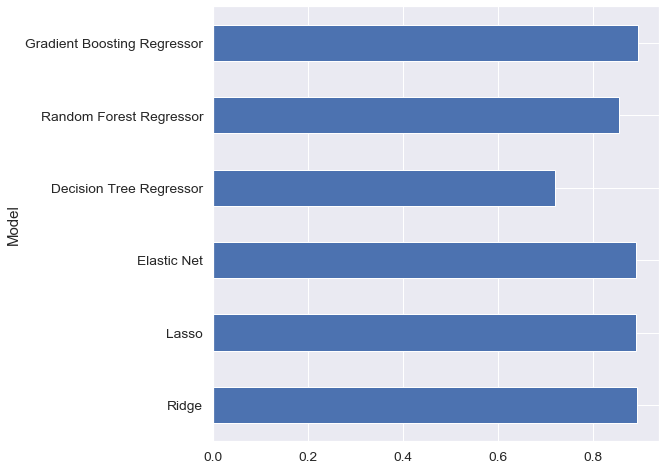

In [88]:
metrics_result.set_index('Model', inplace=True)
metrics_result['r2score'].plot(kind='barh', figsize=(8, 8))

* ### Visualisation of target feature 'SalePrice': Actual vs Predicted

Just for clarification, at these contributions we are using 1 dataset which was splitted at the 'Train/Test split' stage by this command: 

**X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)**

So, X_train and y_train are treated as a Train data, and X_Test and y_test as a Test data.

Here is simple visualisation presented. It shows a comparison between **Actual 'SalePrice' (y_test)** and **Predicted 'SalePrice'** from our models.

In [89]:
# visual comparison between Actual 'SalePrice' and Predicted 'SalePrice'
actualvspredicted = pd.DataFrame({"Actual 'SalePrice'":y_test, 
                                  "Ridge 'SalePrice'":ridge_pred,
                                  "Lasso 'SalePrice'":lasso_pred,
                                  "ENet 'SalePrice'":en_pred,
                                  "DTR 'SalePrice'":dtr_pred,
                                  "RFR 'SalePrice'":rfr_pred,
                                  "GBR 'SalePrice'":gbr_pred,
                                 })
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual 'SalePrice',Ridge 'SalePrice',Lasso 'SalePrice',ENet 'SalePrice',DTR 'SalePrice',RFR 'SalePrice',GBR 'SalePrice'
Id,,,,,,,
412,11.8845,11.8007,11.7991,11.8058,11.9153,11.8324,11.8398
212,12.1335,12.0024,12.003,12.0133,11.9077,12.0656,12.0803
343,11.3794,11.2862,11.2914,11.3319,11.4189,11.5866,11.42
304,11.9177,11.7505,11.7529,11.7594,11.7947,11.8137,11.7587
160,12.6761,12.4802,12.4831,12.4714,12.6302,12.3822,12.4553
1049,11.6527,11.9327,11.9301,11.8927,11.9761,11.9121,11.948
981,12.0918,12.0188,12.0101,12.0306,11.764,12.0144,12.086
234,11.7613,11.71,11.7107,11.7167,11.7947,11.7498,11.7321
255,11.8845,11.846,11.8497,11.8397,11.7997,11.8149,11.8476


## Result

The **leader model** with the best result is **Gradient Boosting Regressor**: with **R2 score higher** than the other models, and with all **Error metrics lower** than the other models.


* #### Suggestions

* For some models the Feature importance can be done (if we need to explore deeper how models give an importance to our choosen features).

* Besides the fact that we have our leader model **Gradient Boosting Regressor**, we can also consider Ridge model since it has good metrics too.

* For better metrics result we can try different scalers (some of our models need scalers, some not need) and play with % of 'train/test split'.



Thank You for your time! 

Anastasia Rizzo